### Python module/package imports for this chapter

In [1]:
import sys, math, collections, itertools, multiprocessing, gzip, dis

In [2]:
import numpy as np

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
%load_ext line_profiler
%load_ext memory_profiler

## Optimizing the computation of the Mandelbrot set 

In [4]:
def run_mandel(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256):
    xs = np.linspace(extent[0],extent[1],res)  # x and y arrays,
    ys = np.linspace(extent[2],extent[3],res)  # equally spaced
    
    escaped = np.zeros((res,res),'d')  # escape status of points
    
    for i in range(res):
        for j in range(res):
            c = xs[i] + 1j * ys[j]
            escaped[i,j] = compute_mandel(c,maxit)
    
    return escaped / maxit  # normalize for better plotting

def compute_mandel(c,maxit=256):
    z = 0.0j

    for it in range(1,maxit):
        z = z*z + c
        
        if abs(z) > 2.0:
            return it

    return np.inf  # no escape within maxit iterations... assume never

In [5]:
def plot_mandel(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256,run_mandel=run_mandel):
    pp.figure(figsize=(6,6))

    cmap = matplotlib.cm.coolwarm
    cmap.set_bad('k')

    pp.imshow(run_mandel(extent,res,maxit).T,extent=extent,
              cmap=cmap,norm=matplotlib.colors.PowerNorm(0.6),
              interpolation='none',origin='lower')

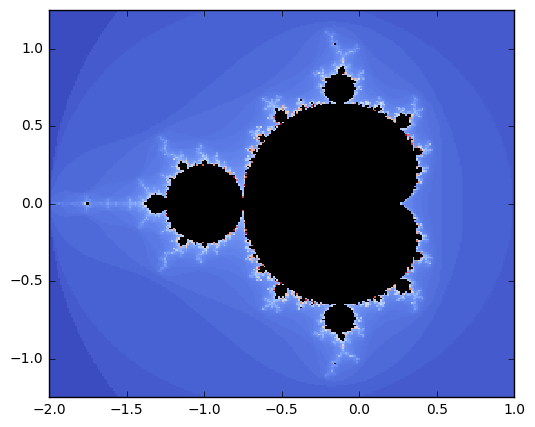

In [6]:
plot_mandel()

In [7]:
%timeit run_mandel()

1 loop, best of 3: 1.25 s per loop


In [8]:
%prun run_mandel()

In [9]:
%lprun -f run_mandel run_mandel()

In [10]:
%lprun -f compute_mandel run_mandel()

In [13]:
def run_mandel_numpy(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256):
    xs = np.linspace(extent[0],extent[1],res)  # x and y arrays,
    ys = np.linspace(extent[2],extent[3],res)  # equally spaced
    
    c = xs[:,np.newaxis] + 1j*ys[np.newaxis,:]
    
    escaped = np.full_like(c,np.inf,'d')  # escape status of points

    z = np.zeros_like(c,'c16')
    
    for it in range(1,maxit):
        z = z*z + c
        
        escaped[(escaped == np.inf) & (np.abs(z) > 2.0)] = it
    
    return escaped / maxit  # normalize for better plotting

/Users/michellevallisneri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in multiply
/Users/michellevallisneri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in multiply
/Users/michellevallisneri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in greater
/Users/michellevallisneri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: RuntimeWarning: overflow encountered in absolute


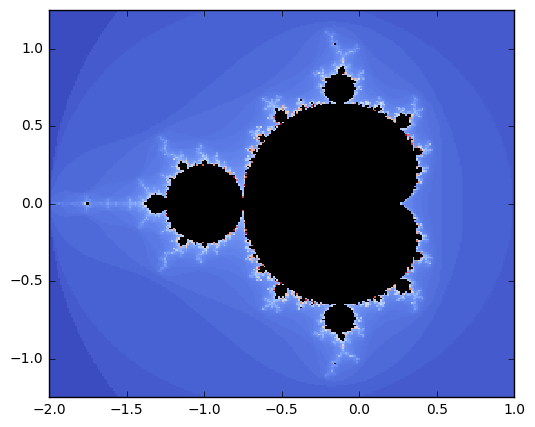

In [14]:
plot_mandel(run_mandel=run_mandel_numpy)

In [15]:
np.seterr(all='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [16]:
%timeit run_mandel_numpy()

10 loops, best of 3: 149 ms per loop


In [17]:
%lprun -f run_mandel_numpy run_mandel_numpy()

In [18]:
from numba.decorators import autojit

In [19]:
@autojit
def run_mandel(extent=[-2.0,1.0,-1.25,1.25],res=256,maxit=256):
    xs = np.linspace(extent[0],extent[1],res)  # x and y arrays,
    ys = np.linspace(extent[2],extent[3],res)  # equally spaced
    
    escaped = np.zeros((res,res),'d')  # escape status of points
    
    for i in range(res):
        for j in range(res):
            c = xs[i] + 1j * ys[j]
            escaped[i,j] = compute_mandel(c,maxit)
    
    return escaped / maxit  # normalize for better plotting

@autojit
def compute_mandel(c,maxit=256):
    z = 0.0j

    for it in range(1,maxit):
        z = z*z + c
        
        if abs(z) > 2.0:
            return it

    return np.inf  # no escape within maxit iterations... assume never

In [21]:
%timeit run_mandel()

10 loops, best of 3: 22.2 ms per loop
